## DECISION TREE
Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?




## Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [221]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [222]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping  reversable defect    4  
904     120   True      3.0         flat  reversable defect    4  
905     123   True      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

## 2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices


In [223]:
df.shape

(908, 13)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [225]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [226]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [227]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [228]:
df.duplicated().sum()

1

In [229]:
df[df.duplicated()]


age   sex           cp  trestbps  chol    fbs           restecg  thalch  \
765   58  Male  non-anginal       150   219  False  st-t abnormality     118   

    exang  oldpeak        slope    thal  num  
765  True      0.0  downsloping  normal    2

In [230]:
df = df.drop_duplicates()

In [231]:
df.duplicated().sum()

0

In [232]:
for i in df.isna().sum():
    print(round(i/len(df)*100,2),'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
6.84 %
0.0 %
0.0 %
0.0 %


In [233]:
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\4171898574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)
C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\4171898574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


In [234]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [235]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

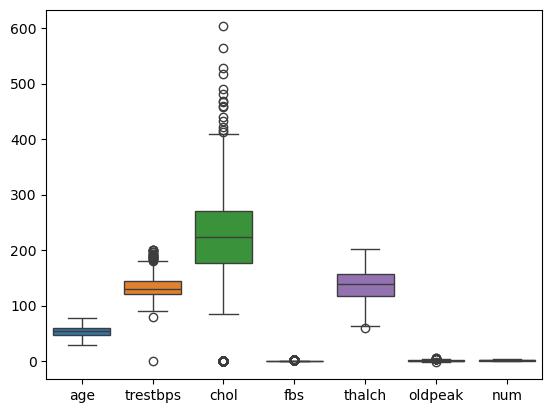

In [236]:
sns.boxplot(df)
plt.show()

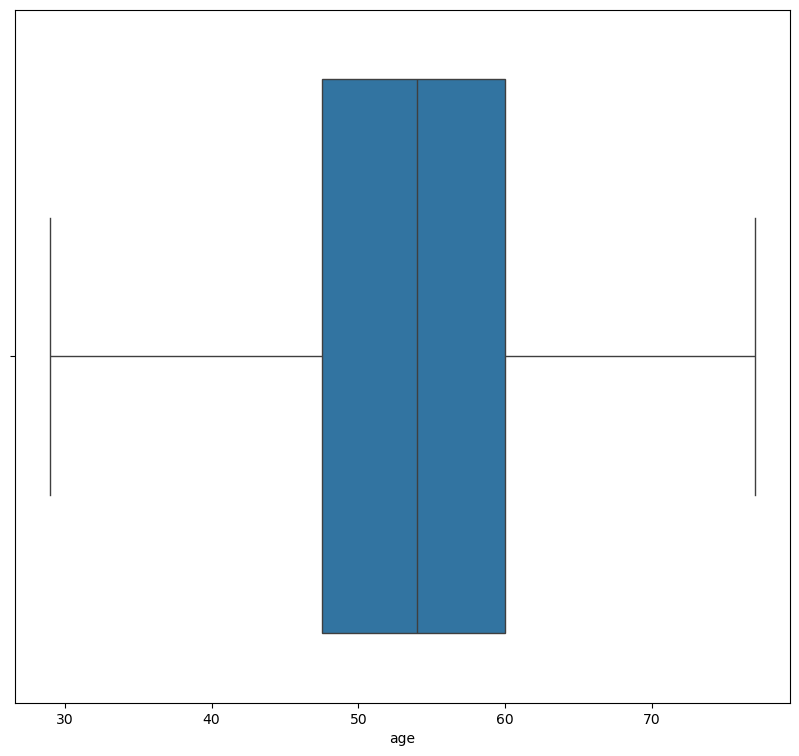

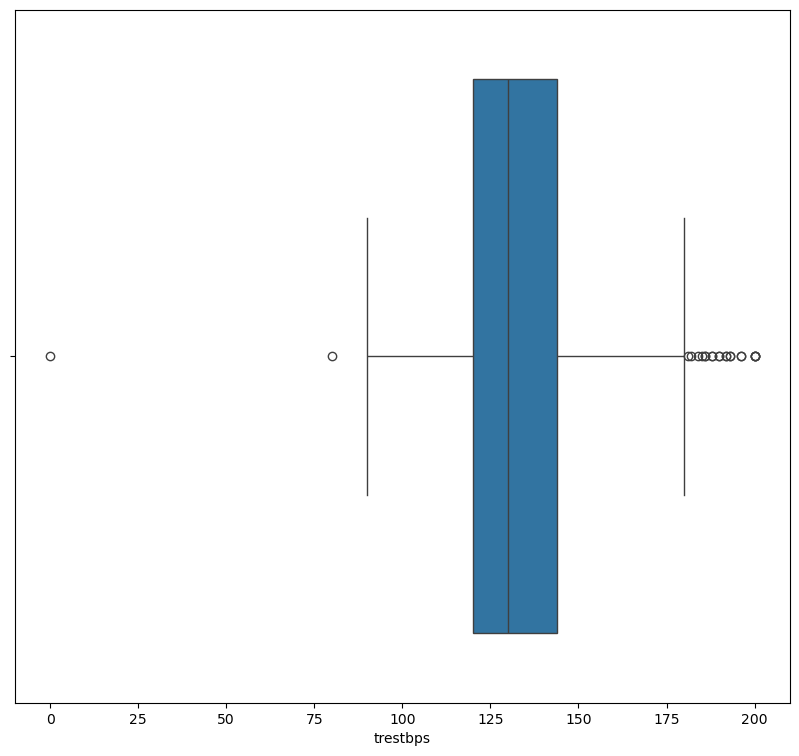

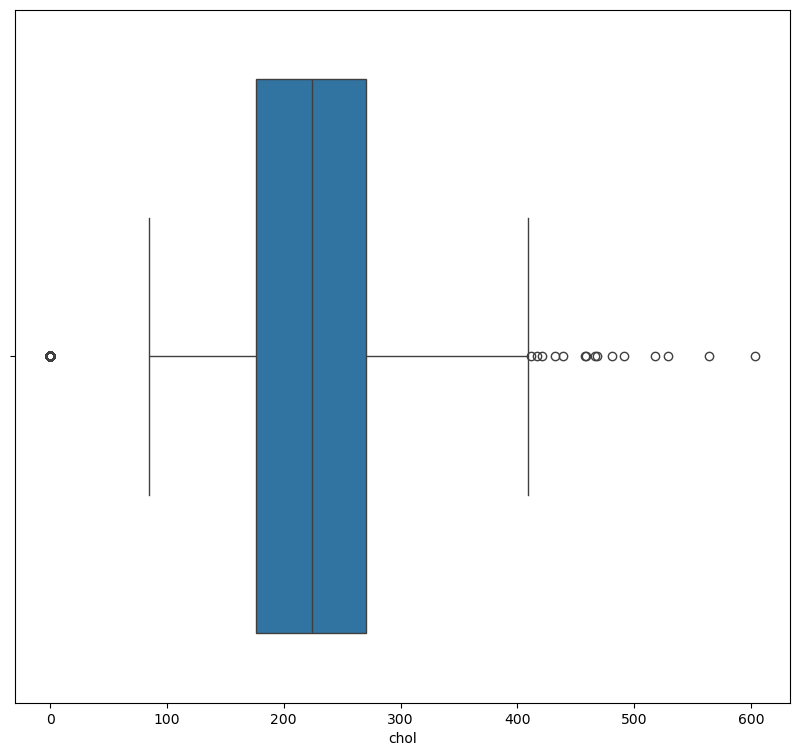

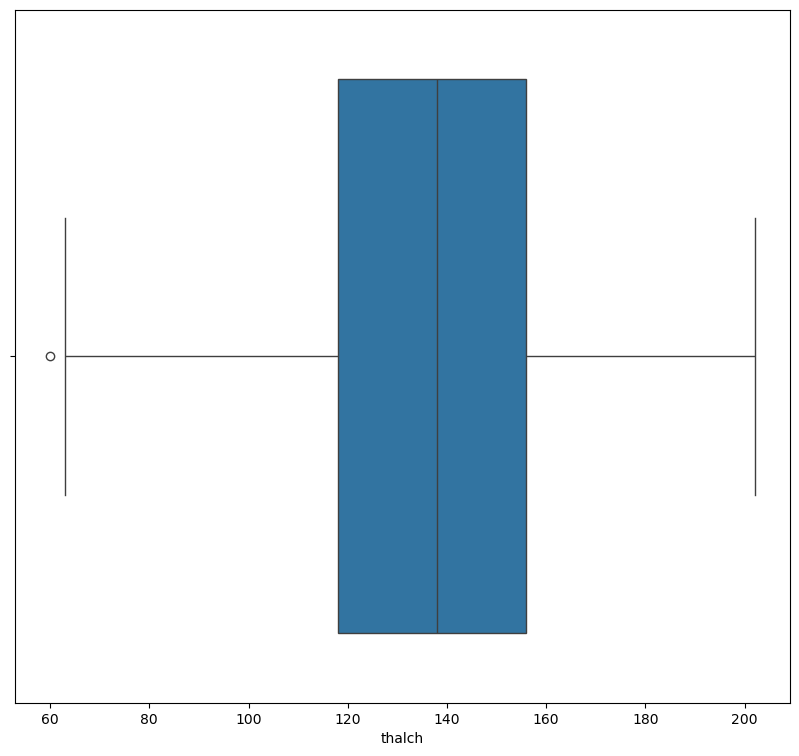

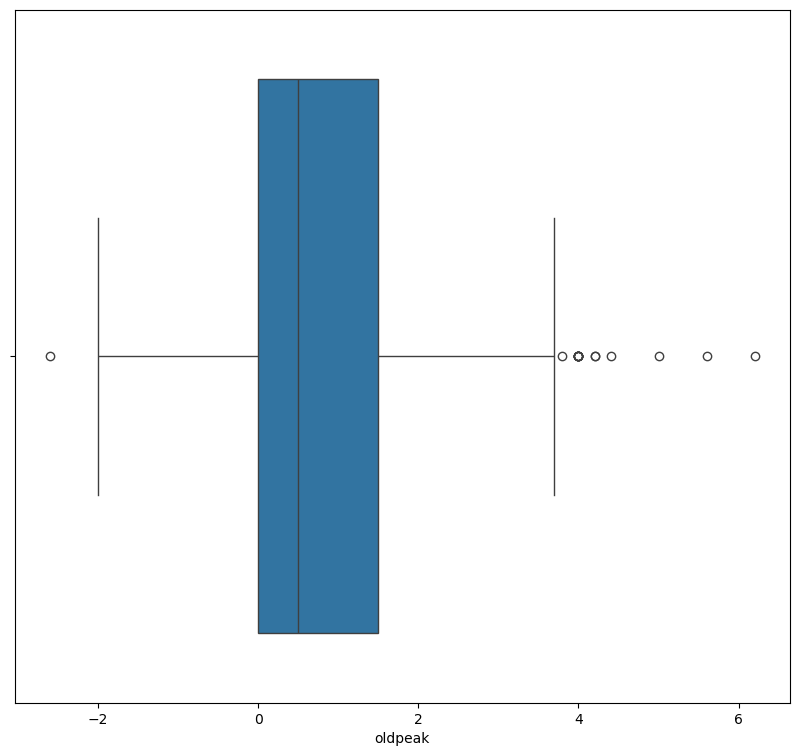

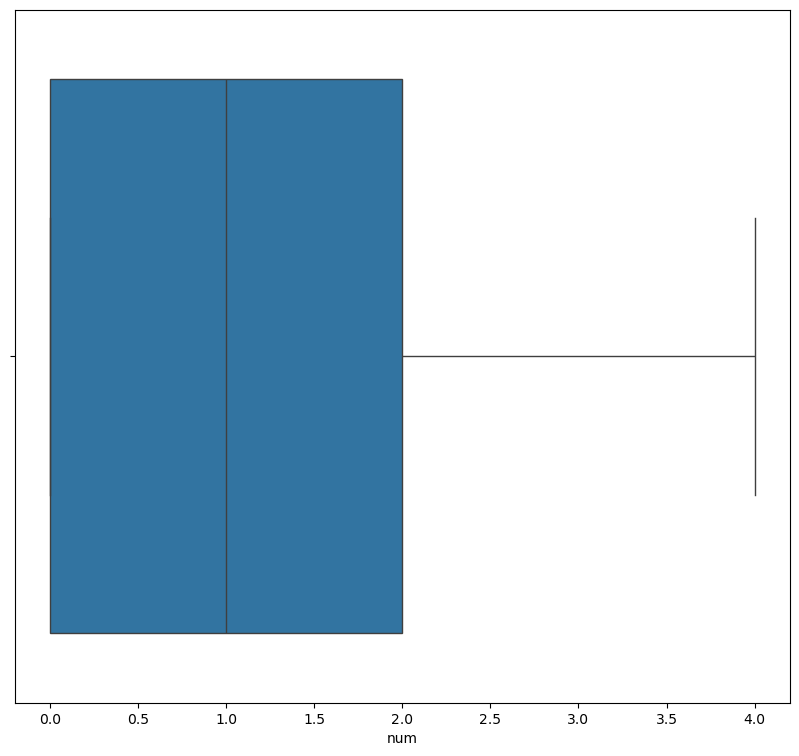

In [237]:
numaric_col = df.select_dtypes(include = ['int64', 'float64'])

for col in numaric_col.columns:
    plt.figure(figsize =(10,9))
    sns.boxplot(x=df[col])
    plt.show()

In [238]:
Q1 = numaric_col.quantile(0.25)
Q3 = numaric_col.quantile(0.75)
IQR = Q3-Q1
outlier_mask = (numaric_col < (Q1 - 1.5 * IQR)) | (numaric_col > (Q3 + 1.5 * IQR))
outlier_mask.sum()

age           0
trestbps     22
chol        187
thalch        1
oldpeak      16
num           0
dtype: int64

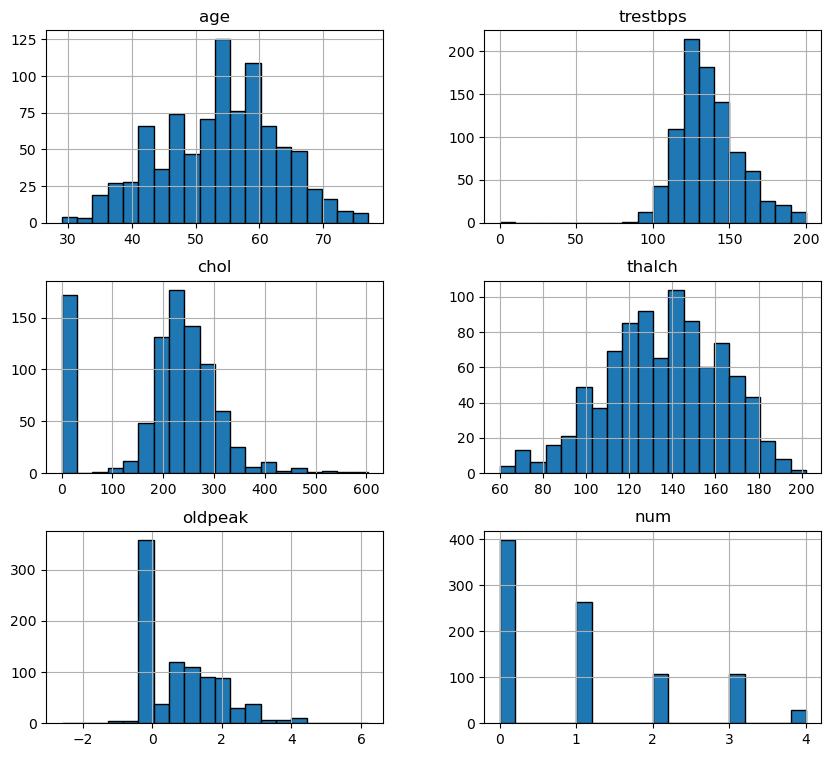

In [239]:
df.hist(figsize= (10,9), bins = 20 , edgecolor = "black")
plt.show()

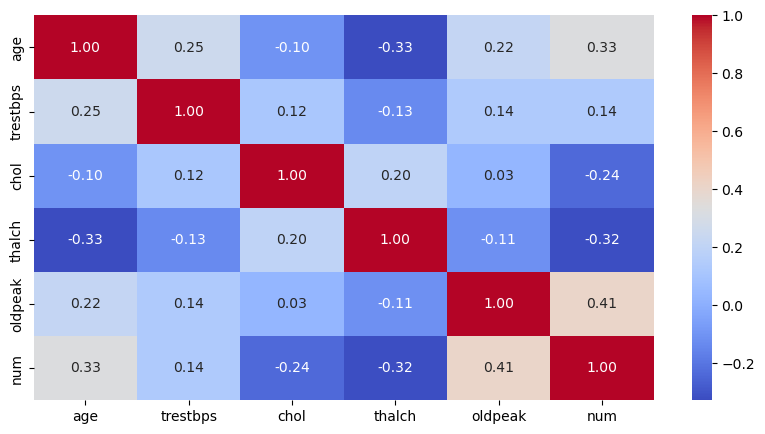

In [240]:
plt.figure(figsize = (10,5))
sns.heatmap(numaric_col.corr(), annot = True, cmap= "coolwarm", fmt=".2f")
plt.show()

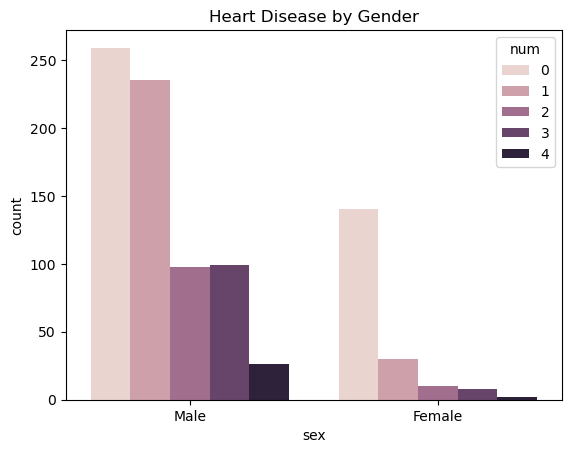

In [241]:
sns.countplot(x = 'sex', hue ='num', data = df)
plt.title("Heart Disease by Gender")
plt.show()


In [242]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [243]:
df['exang'] = df['exang'].astype(bool)
df['sex']= df['sex'].astype(bool)

 # Change the exang  column to int as 0 ,1 as it was not treating the coloun as boolien even the column is boolian 

C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\4239232814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exang'] = df['exang'].astype(bool)
C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\4239232814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']= df['sex'].astype(bool)


In [244]:
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df['sex']= df['sex'].astype(int)

C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\2531209798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fbs'] = df['fbs'].astype(int)
C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\2531209798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exang'] = df['exang'].astype(int)
C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\2531209798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [245]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\2890059117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [246]:
df

age  sex               cp  trestbps  chol  fbs           restecg  thalch  \
0     63    1   typical angina       145   233    1    lv hypertrophy     150   
1     41    1  atypical angina       135   203    0            normal     132   
2     57    1     asymptomatic       140   192    0            normal     148   
3     52    1   typical angina       118   186    0    lv hypertrophy     190   
4     57    1     asymptomatic       110   201    0            normal     126   
..   ...  ...              ...       ...   ...  ...               ...     ...   
903   53    1     asymptomatic       125     0    0            normal     120   
904   62    1     asymptomatic       166   170    0  st-t abnormality     120   
905   56    1      non-anginal       170     0    0    lv hypertrophy     123   
906   56    1      non-anginal       144   208    1  st-t abnormality     105   
907   57    1     asymptomatic       142   277    1  st-t abnormality     182   

     exang  oldpeak        slope               thal  num  
0        0      2.3  downsloping       fixed defect    0  
1        0      0.0         flat       fixed defect    0  
2        0      0.4         flat       fixed defect    0  
3        0      0.0         flat       fixed defect    0  
4        1      1.5         flat       fixed defect    0  
..     ...      ...          ...                ...  ...  
903      0      1.5    upsloping  reversable defect    1  
904      1      3.0         flat  reversable defect    1  
905      1      2.5  downsloping             normal    1  
906      1      0.5  downsloping       fixed defect    1  
907      1      0.5         flat  reversable defect    1  

[907 rows x 13 columns]

In [247]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['cp', 'restecg', 'slope', 'thal'], dtype='object')

In [248]:
for i in cat_cols:
    print(i,"=", df[i].nunique(),"unique Labels")

cp = 4 unique Labels
restecg = 3 unique Labels
slope = 3 unique Labels
thal = 3 unique Labels


## 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [249]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\3754233098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\3754233098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Asad\AppData\Local\Temp\ipykernel_19772\3754233098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [250]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233    1        0     150      0      2.3   
1     41    1   1       135   203    0        1     132      0      0.0   
2     57    1   0       140   192    0        1     148      0      0.4   
3     52    1   3       118   186    0        0     190      0      0.0   
4     57    1   0       110   201    0        1     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
903   53    1   0       125     0    0        1     120      0      1.5   
904   62    1   0       166   170    0        2     120      1      3.0   
905   56    1   2       170     0    0        0     123      1      2.5   
906   56    1   2       144   208    1        2     105      1      0.5   
907   57    1   0       142   277    1        2     182      1      0.5   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2        1     0    0  
3        1     0    0  
4        1     0    0  
..     ...   ...  ...  
903      2     2    1  
904      1     2    1  
905      0     1    1  
906      0     0    1  
907      1     2    1  

[907 rows x 13 columns]

In [251]:
df['num'].unique()

array([0, 1], dtype=int64)

In [252]:
df_encoded.describe()

age    trestbps        chol      thalch       exang     oldpeak  \
count  907.000000  907.000000  907.000000  907.000000  907.000000  907.000000   
mean    53.787211  133.412348  201.465270  135.976847    0.431092    0.865491   
std      9.162016   20.405432  112.158285   26.813075    0.495502    1.060629   
min     29.000000    0.000000    0.000000   60.000000    0.000000   -2.600000   
25%     47.500000  120.000000  176.500000  118.000000    0.000000    0.000000   
50%     54.000000  130.000000  224.000000  138.000000    0.000000    0.500000   
75%     60.000000  144.000000  270.000000  156.000000    1.000000    1.500000   
max     77.000000  200.000000  603.000000  202.000000    1.000000    6.200000   

              num  
count  907.000000  
mean     1.007718  
std      1.144594  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000

In [253]:
df_encoded.isnull().sum()

age                         0
trestbps                    0
chol                        0
thalch                      0
exang                       0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

### 4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [254]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop('num', axis=1)
y = df_encoded['num']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [255]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (725, 16)
X_test shape: (182, 16)
y_train shape: (725,)
y_test shape: (182,)


In [256]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
print(y_pred)

[3 2 4 0 0 2 0 1 0 0 0 1 0 2 1 3 1 2 2 1 1 0 1 0 0 0 3 1 0 1 0 2 3 1 0 3 1
 0 0 1 0 1 0 2 0 0 0 2 0 0 0 0 0 0 0 4 2 1 2 4 0 1 1 1 0 3 2 0 1 4 3 2 0 0
 0 0 1 0 0 0 1 2 1 2 0 1 0 0 1 1 0 0 1 0 1 2 1 3 0 0 1 0 1 2 0 0 0 3 3 1 0
 0 4 0 2 1 0 2 0 0 1 0 0 0 1 2 0 0 0 1 0 0 0 2 3 3 2 0 0 2 0 2 0 2 4 1 1 0
 1 0 1 1 1 3 0 3 2 0 0 1 1 0 3 0 0 1 3 2 1 4 1 2 0 3 0 1 3 1 0 0 0 0]


In [257]:
print('Training accuracy: ', dt.score(x_train,y_train))
print('Testing Accuracy: ', dt.score(x_test,y_test))

Training accuracy:  1.0
Testing Accuracy:  0.4340659340659341


In [258]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)



Accuracy: 0.4340659340659341

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.69        80
           1       0.34      0.30      0.32        53
           2       0.07      0.09      0.08        22
           3       0.28      0.24      0.26        21
           4       0.00      0.00      0.00         6

    accuracy                           0.43       182
   macro avg       0.27      0.27      0.27       182
weighted avg       0.44      0.43      0.43       182


Confusion Matrix:
 [[56 13  5  5  1]
 [15 16 13  5  4]
 [ 7 10  2  2  1]
 [ 3  8  4  5  1]
 [ 2  0  3  1  0]]


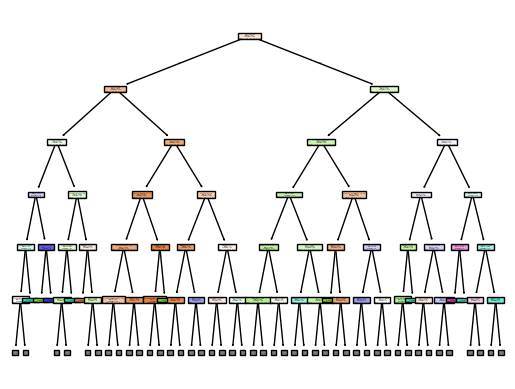

In [259]:
from sklearn import tree
tree.plot_tree(dt, feature_names=x.columns,max_depth=5, filled=True)
plt.show()

In [260]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [261]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [262]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.5682758620689654


In [263]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.5054945054945055


In [264]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73        80
           1       0.38      0.42      0.40        53
           2       0.00      0.00      0.00        22
           3       0.28      0.38      0.32        21
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.27      0.31      0.29       182
weighted avg       0.45      0.51      0.47       182


Confusion Matrix:
 [[62 12  0  6  0]
 [18 22  1 12  0]
 [ 6 13  0  3  0]
 [ 2  9  2  8  0]
 [ 2  2  2  0  0]]


C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot(cmap="Blues")

## 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features

## Answer:
Performance Analysis: Check accuracy, precision, recall, F1-score, and confusion matrix of the Decision Tree to see how well it predicts.

Decision Tree Visualization: Plot the tree to view the rules it learned and find which features are most important.